In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Single prediction plot

In [2]:
preds = pd.read_csv('../output/pred_acciona_2019_18yw20.csv',
                    delimiter=',')
preds.head(3)

,actual,18yw20
0,81.88,82.6400
1,83.10,82.0975
2,83.44,83.6650
3,83.66,82.8770
4,84.84,83.3990


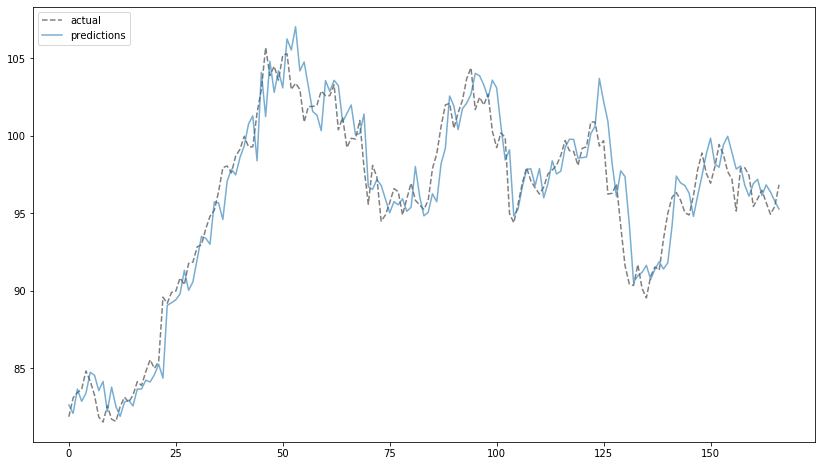

In [46]:
plt.figure(figsize=(14,8))
plt.plot(preds.actual, 'k--', alpha=0.5, label='actual')
plt.plot(preds[preds.columns[1]], alpha=0.6, label='predictions')
plt.legend(loc='upper left')
plt.show()

Compute the correlation between predictions and actual values

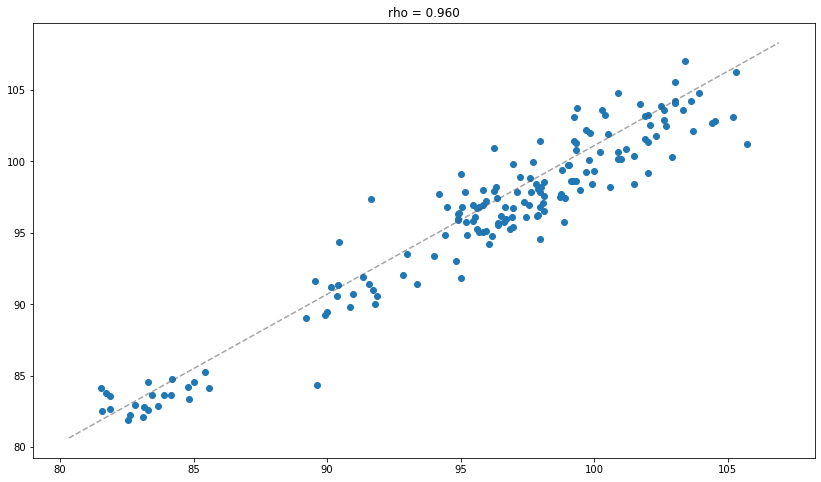

In [48]:
plt.figure(figsize=(14,8))
plt.scatter(preds.actual, preds[preds.columns[1]])
plt.plot(plt.xlim(), plt.ylim(), ls='--', c='.3', alpha=0.5)
plt.title('rho = {:.3f}'.format(pearsonr(preds.actual, preds[preds.columns[1]])[0]))
plt.show()

# Multiple predictions

In [3]:
preds = pd.read_csv('../output/pred_acciona_2010_2018_8yw20_8yw10_8yw05.csv',
                    delimiter=',')
preds.head(3)

,actual,8yw20,8yw10,8yw05,avg,avg_diff,median,med_diff,winner
0,64.75,64.88375,64.656500,64.656500,64.73225,29.47775,64.694375,29.515625,8yw10
1,65.08,64.71125,65.323125,65.501125,65.17850,29.55850,65.250812,29.630813,8yw10
2,65.00,64.31875,65.342500,65.342500,65.00125,29.46125,65.171875,29.631875,8yw10


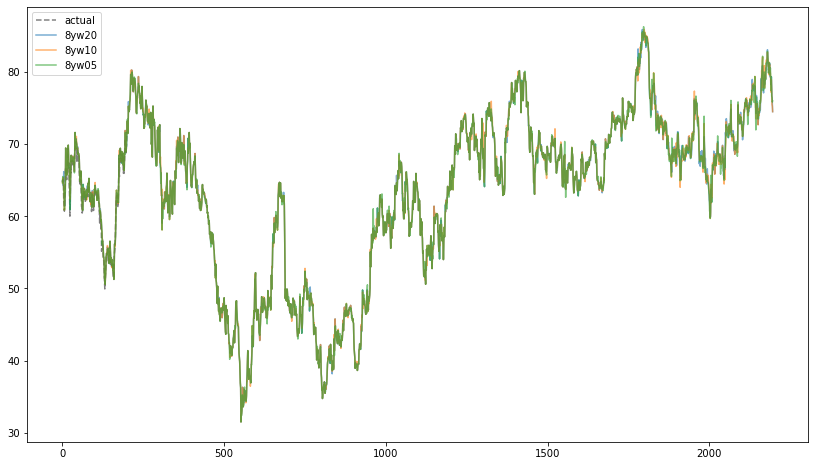

In [4]:
num_preds = preds.columns.get_loc('avg')-1

plt.figure(figsize=(14,8))
plt.plot(preds.actual.iloc[:200], 'k--', alpha=0.5, label='actual')
for i in range(num_preds):
    plt.plot(preds[preds.columns[i+1]], alpha=0.6, label=preds.columns[i+1])
plt.legend(loc='upper left')
plt.show()

Compute a simple matrix with the proportion of times that each network is performing as the best one.

In [5]:
net_names = preds.columns[1:num_preds+1]
print('Net names: {}'.format(net_names))
proportions = preds.winner.value_counts()
weights = pd.DataFrame({'proportion': proportions, 'weight': pd.Series(index=proportions.index)})
weights.weight = weights.proportion / weights.proportion.sum()
weights

Net names: Index(['8yw20', '8yw10', '8yw05'], dtype='object')


,proportion,weight
8yw20,1600,0.728266
8yw05,311,0.141557
8yw10,286,0.130178


Add a new column with the weighted average of each prediction.

In [7]:
preds['w_avg'] = preds['8yw20'] * weights.loc['8yw20'].weight + preds['8yw10'] * weights.loc['8yw10'].weight + preds['8yw05'] * weights.loc['8yw05'].weight


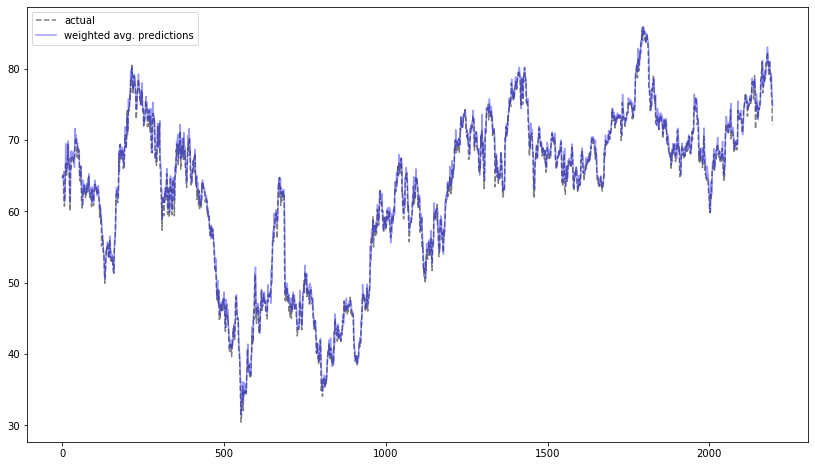

In [8]:
plt.figure(figsize=(14,8))
plt.plot(preds.actual, 'k--', alpha=0.5, label='actual')
plt.plot(preds['w_avg'], 'b-', alpha=0.4, label='weighted avg. predictions')
plt.legend(loc='upper left')
plt.show()

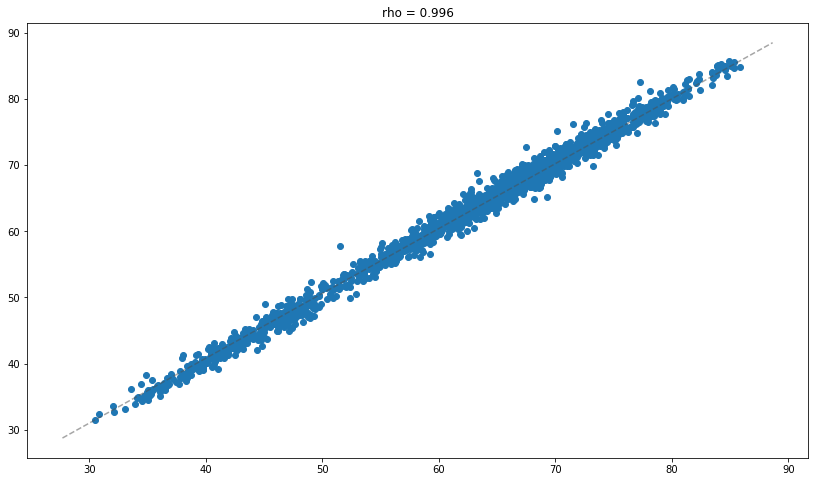

In [9]:
plt.figure(figsize=(14,8))
plt.scatter(preds.actual, preds['w_avg'])
plt.plot(plt.xlim(), plt.ylim(), ls='--', c='.3', alpha=0.5)
plt.title('rho = {:.3f}'.format(pearsonr(preds.actual, preds['w_avg'])[0]))
plt.show()

Compute the correlation with previous values

In [10]:
corrs = []
for shift in range(1, 11):
    starting_point = 10
    end_point = preds.shape[0]
    lower_limit = starting_point - shift
    upper_limit = end_point - shift
    p = pearsonr(preds.iloc[starting_point:end_point]['w_avg'], preds.iloc[lower_limit:upper_limit]['actual'])[0]
    corrs.append(p)

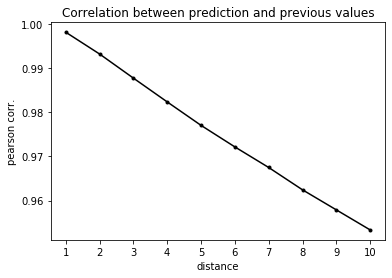

In [11]:
plt.plot(range(1, 11), corrs, 'k.-')
plt.xticks(range(1,11))
plt.title('Correlation between prediction and previous values')
plt.xlabel('distance')
plt.ylabel('pearson corr.')
plt.show()

In [12]:
preds.head()

,actual,18yw20,18yw10,18yw05,avg,avg_diff,median,med_diff,winner,w_avg
0,44.70,45.55125,45.36750,45.36750,45.428750,30.188750,45.398125,30.158125,18yw10,45.486352
1,44.51,45.23125,45.23125,45.23125,45.231250,30.181250,45.231250,30.181250,18yw20,45.231250
2,45.70,45.16375,45.01875,45.01875,45.067083,30.092917,45.042917,30.117083,18yw20,45.112538
3,46.94,46.19000,46.69400,45.35000,46.078000,30.322000,46.134000,30.266000,18yw10,46.123592
4,47.90,49.30550,49.30550,49.30550,49.305500,30.865500,49.305500,30.865500,18yw20,49.305500


# Convert to input to RL-Model

In [12]:
preds[['actual','w_avg']].to_csv('../output/forecast_acciona_2010_2018.csv', header=['test_y', 'forecast'], index=False, float_format='%.2f')